### Add description in readme

In [103]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [104]:
# Eden's computer
filename = '//Users//edenshrian//Desktop//Documents//כלכלה //שנה ג//סמסטר ב//Machine Learning//train.csv'

In [83]:
# Nir's computer
filename = 'train.csv'

In [ ]:
df = pd.read_csv(filename)

In [84]:
df.shape

(1460, 81)

In [85]:
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
164,165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,152000
153,154,20,RL,NaN,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,235000
827,828,20,RL,65.0,8529,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,189000
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
1235,1236,70,RL,96.0,13132,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,138887
115,116,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,176000
52,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
65,66,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,317000
1134,1135,60,RL,57.0,8773,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,169000
321,322,60,RL,99.0,12099,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,354000


## data exploration 

1.8828757597682129


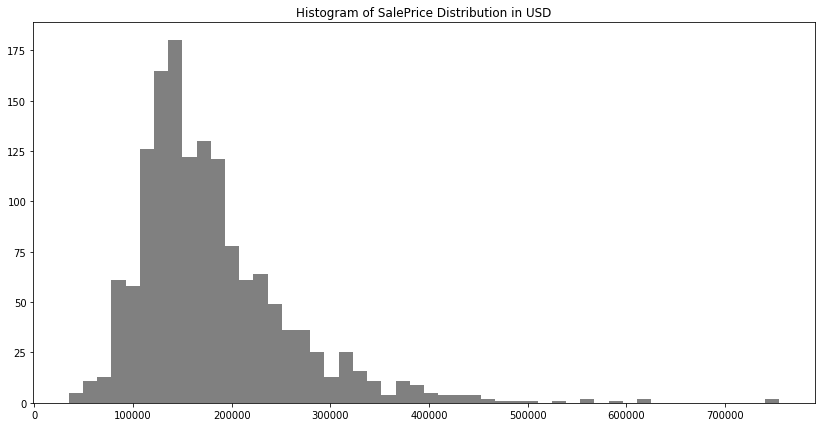

In [108]:
plt.figure(figsize = (14,7))
plt.hist(df['SalePrice'],bins=50,color = 'grey');
plt.title('Histogram of SalePrice Distribution in USD');
print(df['SalePrice'].skew())

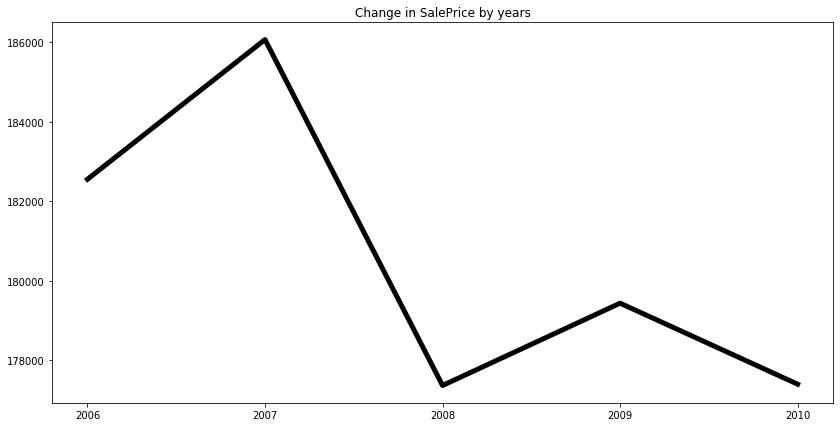

In [109]:
plt.figure(figsize = (14,7))
group = df.groupby(['YrSold']).mean() 
plt.plot(group['SalePrice'].index,group['SalePrice'].values,'black',linewidth=5);
plt.xticks([year for year in range(2006, 2011)]);
plt.title('Change in SalePrice by years');

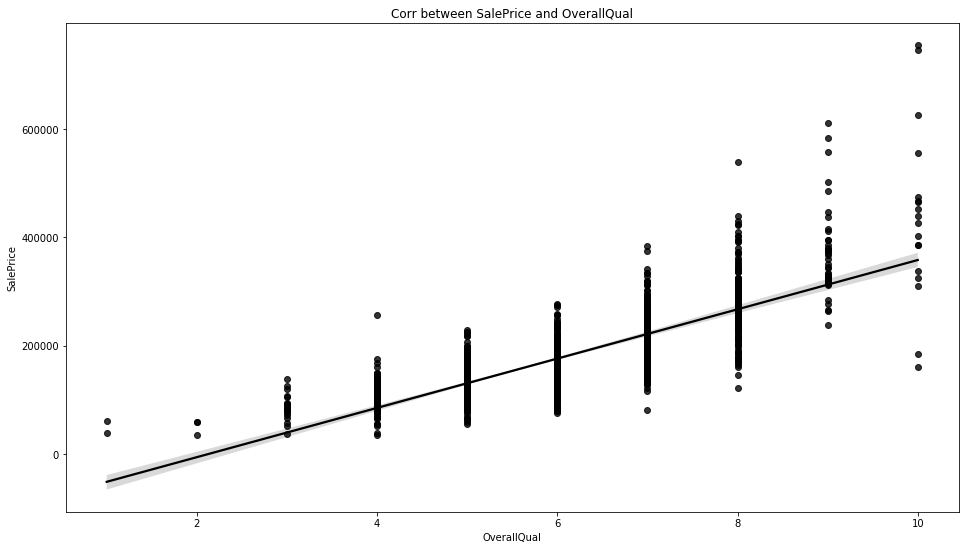

In [88]:
plt.figure(figsize=(16,9))
sns.regplot(data = df, x='OverallQual', y='SalePrice', color = 'Black')
plt.title('Corr between SalePrice and OverallQual');

## Feature engineering 

In [110]:
#  Set a Categorical without relation to order
df.MSSubClass = pd.Categorical(df.MSSubClass,ordered=False)

#  Alley: Type of alley access to property changed for dummies
df.Alley = df.Alley.fillna(0)

#  LotFrontage: Linear feet of street connected to property
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.mean())

#  MasVnrArea: Masonry veneer area in square feet
df.MasVnrArea = df.MasVnrArea.fillna(0)

#  Genarate new vab by the presticge of the neighborhood
df['Neighborhood_Rich'] = df.Neighborhood.map(features_dict)
df['Neighborhood_Rich'] = df.Neighborhood_Rich.replace(features_dict)

#  ExterQual: Evaluates the quality of the material on the exterior 
df['ExterQual_scale'] = df.ExterQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

#  ExterCond: Evaluates the present condition of the material on the exterior
df['ExterCond_scale'] = df.ExterCond.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

#  BsmtQual: Evaluates the height of the basement
df['BsmtQual_scale'] = df.BsmtQual.replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0])
df.BsmtQual_scale = df.BsmtQual_scale.fillna(0)

#  BsmtCond: Evaluates the general condition of the basement
df['BsmtCond_scale'] = df.BsmtCond.replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0])

#BsmtExposure: Refers to walkout or garden level walls
df['BsmtExposure_scale'] = df.BsmtCond.replace(['Gd','Av','MN','NO','NA'],[3,2,1,0,0])

#HeatingQC: Heating quality and condition
df['ExterQual_scale'] = df.ExterQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

#CentralAir: Central air conditioning
df['CentralAir'] = df.CentralAir.replace(['Y','N'],[1,0],inplace=True)

#KitchenQual: Kitchen quality
df['KitchenQual_scale'] = df.KitchenQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

#Functional: Home functionality (Assume typical unless deductions are warranted)
df['KitchenQual_scale'] = df.KitchenQual.replace(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],[8,7,6,5,4,3,2,1])

#GarageType: Garage location
df.GarageType = df.GarageType.fillna('No_Garage')

#GarageFinish: Interior finish of the garage
df.GarageFinish = df.GarageFinish.fillna('No_Garage')
df['GarageFinish_scale'] = df.GarageFinish.replace(['Fin','RFn','Unf','NO_Garage'],[3,2,1,0])

#GarageQual: Garage quality
df.GarageQual = df.GarageQual.fillna('No_Garage')
df['GarageFinish_scale'] = df.GarageFinish.replace(['Ex','Gd','TA','Fa','Po','No_Garage'],[5,4,3,2,1,0])

#PavedDrive: Paved driveway
df['PavedDrive'] = df.PavedDrive.replace(['Y','N','P'],[1,0,0],inplace=True)

#PoolQC: Pool quality The Fa and Gd is the same
df.PoolQC = df.PoolQC.fillna('No_Pool')
df['PoolQC'] = df.PavedDrive.replace(['Ex','Gd','TA','Fa','No_Pool'],[2,1,1,1,0],inplace=True)




In [111]:
#Drop
#ID
#Utilities - All observations are the same.
#Condition2 - all observations are the same.
#RoofMatl - all observations are the same.
#Exterior1st - The house Exterior covering doesn't reflect any trend in the house pricing
#MasVnrType - Half of the obvservation are NAN
#BsmtFinType1 - This feature is determined by his size
#BsmtFinType2 - This feature is determined by his size
#Heating - does not include informative values
#Fireplaces - does not include informative values
#FireplaceQu - does not include informative values
#GarageCond - does not include informative values
#MiscFeature - Not enough data
#SaleType - The project is the important thing and not how they finance it
#SaleCondition - The value of the house does not depend on the way it sold

In [112]:
df.drop('Id',inplace=True,axis=1)
df.drop('Utilities',inplace=True,axis=1)
df.drop('Condition2',inplace=True,axis=1)
df.drop('RoofMatl',inplace=True,axis=1)
df.drop('Exterior1st',inplace=True,axis=1)
df.drop('MasVnrType',inplace=True,axis=1)
df.drop('BsmtFinType1',inplace=True,axis=1)
df.drop('BsmtFinType2',inplace=True,axis=1)
df.drop('Heating',inplace=True,axis=1)
df.drop('Fireplaces',inplace=True,axis=1)
df.drop('FireplaceQu',inplace=True,axis=1)
df.drop('GarageCond',inplace=True,axis=1)
df.drop('MiscFeature',inplace=True,axis=1)
df.drop('SaleType',inplace=True,axis=1)
df.drop('SaleCondition',inplace=True,axis=1)

## Interaction variables 

In [113]:
df['Interact_Pool_area_quality'] = df['PoolArea'] * df['PoolQC']
df['Interact_Qual_area'] = df['LotArea']*df['OverallQual']
df['Interact_basement'] = df['TotalBsmtSF']*df['BsmtQual']
df['Intract_Garage_area'] = df['GarageCars']*df['GarageArea']
df['Intract_NB_OQ'] = df['OverallQual']*df['Neighborhood']
df['Intract_KitchenABv_KitchenQual_scale'] = df['KitchenAbvGr']*df['KitchenQual_scale']
df['Intract_GarageQual_Garagearea'] = df['GarageQual']*df['GarageArea']
df['Intract_HeatingQC_CentralAir'] = df['HeatingQC']*df['CentralAir']
df['interact_Garage_cars'] = df['GarageCars']*df['GarageArea']

## Get Dummies

In [114]:
#Dummies
#MSZoning,Alley,Street,LotShape,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle
#RoofStyle,Foundation,Electrical,GarageType,Fence

In [115]:
#get dummies for the rest
df = pd.get_dummies(df)

In [116]:
#Check the corr with saleprice
corr = pd.Series(df.corrwith(df['SalePrice']).sort_values())

In [117]:
#Dropping features with corr between 0.2 to -0.2 
df.drop(corr[(corr<0.2) & (corr>(-0.2))].index,inplace=True,axis=1)

In [118]:
#GarageYrBlt drop 81 rows
df = df.dropna()

In [119]:
df.shape

(1379, 82)

# Train Test Split

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Scaling

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Helper function for evaluation

In [123]:
from sklearn.metrics import mean_absolute_error


def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    y_pred_train = regressor.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    model_name = regressor.__class__.__name__
    print('{0} mean absolute error is {1:.4f} (MAE train {2:.4f})'.format(model_name, mae, mae_train))
    return mae, mae_train, model_name

In [124]:
models_errors = {}
models_errors_train = {}

# Models

### Benchmark

In [125]:
class Benchmark:
    def fit(self, x, y):
        self.value = y.mean()
        return self
    
    def predict(self, x):
        return np.ones(len(x))*self.value
    
benchmark = Benchmark()
model_mae, model_mae_train, model_name = check_regressor(benchmark, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

Benchmark mean absolute error is 56659.1560 (MAE train 57103.5568)


### Decision Tree Regressor

#### Checking the best depth

In [126]:
from sklearn.tree import DecisionTreeRegressor
train_acc = []
test_acc = []


for i in range(20):
    decision_tree = DecisionTreeRegressor(max_depth=i+1, random_state=101)
    decision_tree.fit(X_train,y_train)
    y_train_pred = decision_tree.predict(X_train)
    train_acc.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = decision_tree.predict(X_test)
    test_acc.append(mean_absolute_error(y_test, y_test_pred))



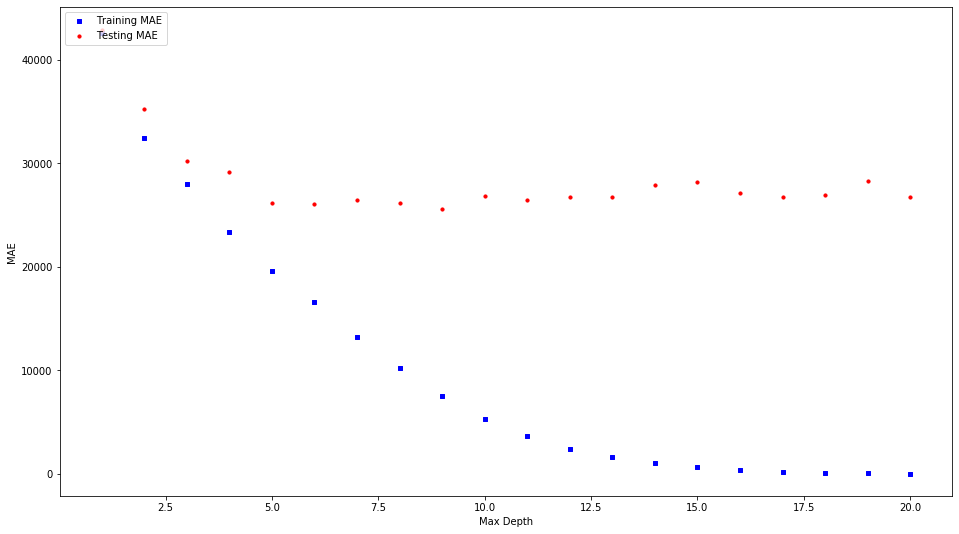

In [26]:
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)


ax1.scatter(range(1, 21), train_acc, s=10, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 21) ,test_acc, s=10, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Max Depth")
plt.legend(loc='upper left');
plt.show()

In [27]:
for i in range(20):
    print("Depth:"+str(i+1) + " test_acc: "+str(test_acc[i]) + " train_acc: "+str(train_acc[i]))

Depth:1 test_acc: 42830.76446049848 train_acc: 42535.05609234053
Depth:2 test_acc: 35210.708288597336 train_acc: 32428.63339477809
Depth:3 test_acc: 30224.001866124614 train_acc: 28019.029237683983
Depth:4 test_acc: 29141.734609282423 train_acc: 23387.10513001377
Depth:5 test_acc: 26188.030047665805 train_acc: 19571.502794466975
Depth:6 test_acc: 26028.138848601408 train_acc: 16575.293581253965
Depth:7 test_acc: 26416.301135447364 train_acc: 13212.213636109822
Depth:8 test_acc: 26190.973987107413 train_acc: 10202.107946683172
Depth:9 test_acc: 25526.51798075572 train_acc: 7467.788368947527
Depth:10 test_acc: 26787.529299790564 train_acc: 5301.1814707192525
Depth:11 test_acc: 26441.51168890881 train_acc: 3615.7514635334223
Depth:12 test_acc: 26686.80178164546 train_acc: 2400.0702366052806
Depth:13 test_acc: 26687.4813630585 train_acc: 1621.6757953602043
Depth:14 test_acc: 27924.520811636026 train_acc: 1011.2742344695923
Depth:15 test_acc: 28212.41809983897 train_acc: 608.311269366782
De

#### The Chosen max_depth= 6 

In [127]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

max_depth =6
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=101)
model_mae, model_mae_train, model_name = check_regressor(decision_tree, X_train_scaled, y_train, X_test_scaled, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train## Decision Tree Regressor

DecisionTreeRegressor mean absolute error is 26028.1388 (MAE train 16575.2936)


In [129]:
feature_importances = decision_tree.feature_importances_
features = X_train.columns
stats = pd.DataFrame({'importance':feature_importances},index=features)
stats = stats.sort_values(by=['importance'])
importnce = stats.tail(14)
importnce

,importance
KitchenQual_scale_Gd,0.004192
GarageArea,0.004323
YearRemodAdd,0.006583
Intract_Garage_area,0.008362
YearBuilt,0.008374
BsmtFinSF1,0.011480
1stFlrSF,0.012651
GarageCars,0.013696
Interact_Qual_area,0.018470
TotalBsmtSF,0.024028


### Linear Regression

LinearRegression mean absolute error is 20153.7337 (MAE train 17856.3521)


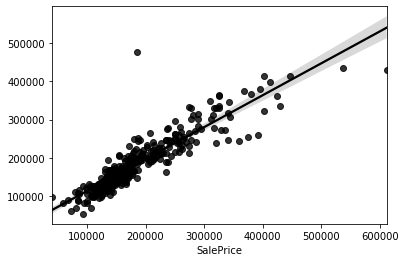

In [31]:
from sklearn.linear_model import LinearRegression


linear_regressor = LinearRegression()
model_mae, model_mae_train, model_name = check_regressor(linear_regressor, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train
y_pred = linear_regressor.predict(X_test)
sns.regplot(y_test,y_pred, color= 'black');


### Lasso

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=3, normalize=True)
model_mae, model_mae_train, model_name = check_regressor(lasso, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train
y_pred = lasso.predict(X_test)


#sns.scatterplot(y_test,y_pred)

Lasso mean absolute error is 20095.2675 (MAE train 17677.6915)


In [35]:
cof = lasso.coef_
features = X_train.columns
coef = pd.DataFrame({'Coef':cof},index=features)

coef.sort_values(by=['Coef']).tail(14)



,Coef
GarageType_Attchd,11809.019994
Intract_NB_OQ_NoRidgeNoRidgeNoRidgeNoRidgeNoRidgeNoRidgeNoRidgeNoRidge,14029.508934
BsmtExposure_Gd,15971.809351
Intract_NB_OQ_NridgHtNridgHtNridgHtNridgHtNridgHtNridgHtNridgHtNridgHt,16803.615966
Neighborhood_Rich,17138.422253
BsmtQual_Ex,18016.304366
GarageType_BuiltIn,18485.770506
Neighborhood_NoRidge,21352.347965
Intract_KitchenABv_KitchenQual_scale_TA,22531.931412
KitchenQual_Ex,28574.935205


### Nearest Neighbors Regressor

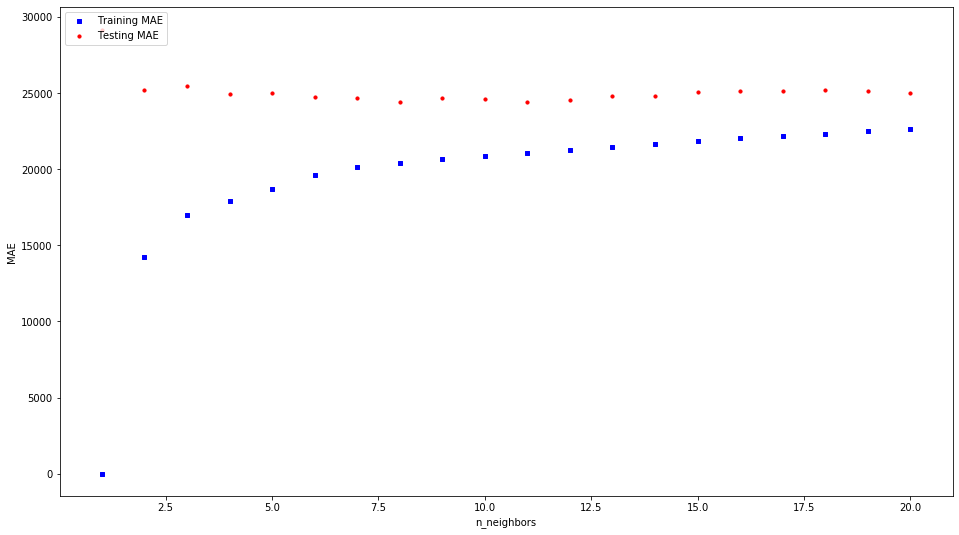

In [36]:
from sklearn.neighbors import KNeighborsRegressor 
train_acc = []
test_acc = []


for i in range(20):
    nearest_neighbors = KNeighborsRegressor(n_neighbors=i+1)
    nearest_neighbors.fit(X_train_scaled,y_train)
    y_train_pred = nearest_neighbors.predict(X_train_scaled)
    train_acc.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = nearest_neighbors.predict(X_test_scaled)
    test_acc.append(mean_absolute_error(y_test, y_test_pred))

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 21), train_acc, s=10, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 21) ,test_acc, s=10, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("n_neighbors")
plt.legend(loc='upper left');
plt.show()

In [37]:
for i in range(20):
    print("n_neighbors:"+str(i+1) + " test_acc: " + str(test_acc[i]) + " train_acc: "+str(train_acc[i]))

n_neighbors:1 test_acc: 29134.710144927536 train_acc: 0.0
n_neighbors:2 test_acc: 25200.002898550723 train_acc: 14258.666344294004
n_neighbors:3 test_acc: 25494.06086956522 train_acc: 16970.292069632495
n_neighbors:4 test_acc: 24962.742753623188 train_acc: 17932.505802707932
n_neighbors:5 test_acc: 24994.05391304348 train_acc: 18701.64526112186
n_neighbors:6 test_acc: 24738.571497584544 train_acc: 19585.848001289494
n_neighbors:7 test_acc: 24669.744513457554 train_acc: 20156.651284885327
n_neighbors:8 test_acc: 24424.921739130434 train_acc: 20416.692940038683
n_neighbors:9 test_acc: 24644.487600644123 train_acc: 20673.54319793681
n_neighbors:10 test_acc: 24595.596231884057 train_acc: 20865.15560928433
n_neighbors:11 test_acc: 24425.469038208168 train_acc: 21032.46720590821
n_neighbors:12 test_acc: 24539.621739130434 train_acc: 21275.341070277238
n_neighbors:13 test_acc: 24779.056856187286 train_acc: 21458.94881714031
n_neighbors:14 test_acc: 24805.44575569358 train_acc: 21641.493299253

#### The choosen K =8

In [39]:
k = 8
nearest_neighbors = KNeighborsRegressor(k)
model_mae, model_mae_train, model_name = check_regressor(nearest_neighbors, X_train_scaled, y_train, X_test_scaled, y_test)
model_name += 'Scaled'
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

KNeighborsRegressor mean absolute error is 24424.9217 (MAE train 20416.6929)


### Random Forest

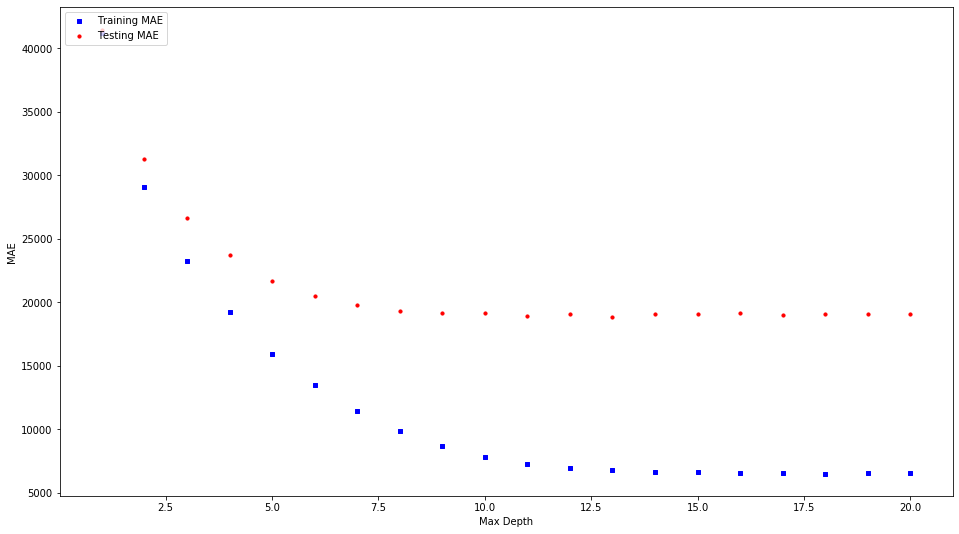

In [40]:
from sklearn.ensemble import RandomForestRegressor
train_acc = []
test_acc = []


for i in range(20):
    random_forest = RandomForestRegressor(n_estimators=150, max_depth=i+1, random_state=101)
    random_forest.fit(X_train_scaled,y_train)
    y_train_pred = random_forest.predict(X_train_scaled)
    train_acc.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = random_forest.predict(X_test_scaled)
    test_acc.append(mean_absolute_error(y_test, y_test_pred))

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 21), train_acc, s=10, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 21) ,test_acc, s=10, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Max Depth")
plt.legend(loc='upper left');
plt.show()

In [41]:
for i in range(20):
    print("Depth:"+str(i+1) + " test_acc: "+str(test_acc[i]) + " train_acc: "+str(train_acc[i]))

Depth:1 test_acc: 41391.1917265808 train_acc: 41167.96892239365
Depth:2 test_acc: 31263.02861427866 train_acc: 29054.83938904735
Depth:3 test_acc: 26603.165162311278 train_acc: 23221.88405664082
Depth:4 test_acc: 23703.980650417398 train_acc: 19199.293629708638
Depth:5 test_acc: 21701.154343924674 train_acc: 15906.788961997063
Depth:6 test_acc: 20444.758685101413 train_acc: 13510.642252267076
Depth:7 test_acc: 19803.98089710826 train_acc: 11449.001414807544
Depth:8 test_acc: 19325.27384295322 train_acc: 9895.773420948586
Depth:9 test_acc: 19112.878565470506 train_acc: 8702.10585795369
Depth:10 test_acc: 19107.120640693698 train_acc: 7842.348471088748
Depth:11 test_acc: 18907.634132464336 train_acc: 7265.702701306493
Depth:12 test_acc: 19044.243914473594 train_acc: 6972.187810120119
Depth:13 test_acc: 18855.483034728415 train_acc: 6769.840424324076
Depth:14 test_acc: 19057.73482590317 train_acc: 6651.952576408859
Depth:15 test_acc: 19068.7794163548 train_acc: 6605.471201113138
Depth:16 

#### The Chosen Max Depth = 7

#### max_depth = 13 is better in the test MAE, but we think it's in overfit, so we chose max_depth = 7 

In [42]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 150
max_depth = 7
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=101)
model_mae, model_mae_train, model_name = check_regressor(random_forest, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

RandomForestRegressor mean absolute error is 19795.0258 (MAE train 11448.7081)


In [43]:
feature_importances = random_forest.feature_importances_
features = X_train.columns
stats = pd.DataFrame({'importance':feature_importances},index=features)
stats = stats.sort_values(by=['importance'])
importnce = stats.tail(13)
importnce

,importance
MasVnrArea,0.009816
FullBath,0.010385
Intract_Garage_area,0.010629
interact_Garage_cars,0.010724
GarageCars,0.015749
BsmtFinSF1,0.018032
1stFlrSF,0.018599
TotalBsmtSF,0.028621
2ndFlrSF,0.029442
Interact_Qual_area,0.040578


### Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gradient = GradientBoostingRegressor(random_state=101)
model_mae, model_mae_train, model_name = check_regressor(gradient, X_train_scaled, y_train, X_test_scaled, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

GradientBoostingRegressor mean absolute error is 17536.8757 (MAE train 10780.0769)


In [45]:
feature_importances = gradient.feature_importances_
features = X_train.columns
stats = pd.DataFrame({'importance':feature_importances},index=features)
stats = stats.sort_values(by=['importance'])
importnce = stats.tail(14)
importnce

,importance
FullBath,0.011287
1stFlrSF,0.011405
BsmtQual_Ex,0.011573
YearBuilt,0.012664
ExterQual_scale,0.019683
interact_Garage_cars,0.020955
BsmtFinSF1,0.028445
2ndFlrSF,0.032109
GarageCars,0.033977
TotalBsmtSF,0.037401


### AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostRegressor

n_estimators = 150
max_depth = 6
base_estimator = DecisionTreeRegressor(max_depth=max_depth)
ada_boost_decision_tree = AdaBoostRegressor(random_state=101, n_estimators=n_estimators, base_estimator=base_estimator)
model_mae, model_mae_train, model_name = check_regressor(ada_boost_decision_tree, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

AdaBoostRegressor mean absolute error is 19141.4041 (MAE train 10543.8346)


### Ada Boost with random forest

In [47]:
n_estimators = 30
max_depth = 7
base_estimator = RandomForestRegressor(max_depth=max_depth)
ada_boost_random_forest = AdaBoostRegressor(random_state=101, n_estimators=n_estimators, base_estimator=base_estimator)
model_mae, model_mae_train, model_name = check_regressor(ada_boost_random_forest, X_train, y_train, X_test, y_test)
models_errors[model_name] = model_mae
models_errors_train[model_name] = model_mae_train

AdaBoostRegressor mean absolute error is 18686.2885 (MAE train 9516.6951)


# Performance Comparision

In [48]:
def compare_performance(models_errors_train, models_errors):
    return pd.DataFrame({'train':models_errors_train, 'test':models_errors}).sort_values('test')

x = compare_performance(models_errors_train, models_errors)
x

,train,test
GradientBoostingRegressor,10780.076920,17536.875746
AdaBoostRegressor,9516.695052,18686.288495
RandomForestRegressor,11448.708100,19795.025819
Lasso,17677.691468,20095.267527
LinearRegression,17856.352140,20153.733708
KNeighborsRegressorScaled,20416.692940,24424.921739
DecisionTreeRegressor,16575.293581,26028.138849
Benchmark,57103.556809,56659.156017


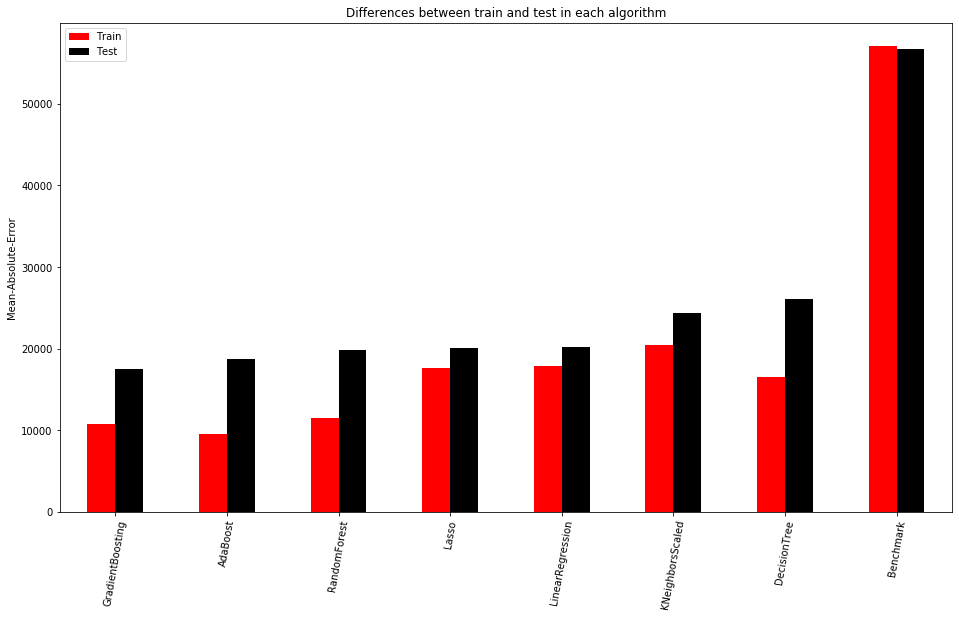

In [49]:
train = x['train'].values.tolist()
test = x['test'].values.tolist()
index = ['GradientBoosting', 'AdaBoost', 'RandomForest',
         'Lasso', 'LinearRegression', 'KNeighborsScaled', 'DecisionTree','Benchmark']
df = pd.DataFrame({'Train': train,
                   'Test': test}, index=index)
ax = df.plot.bar(rot=80,colormap='flag',figsize = (16,9));
plt.title('Differences between train and test in each algorithm');
plt.ylabel('Mean-Absolute-Error');

# Cross Validation 

In [67]:
from sklearn.model_selection import cross_validate
cross_validation = {}

### Gradineat boost

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
gradient = GradientBoostingRegressor(n_estimators=150)
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
score = cross_validate(gradient,X=X,y=y, cv=9, scoring='neg_mean_absolute_error')
print("Cross Validate MAE in Gradient is: " + str(abs(score['test_score'].mean())))
cross_validation['gradient'] = abs(score['test_score'].mean())

Cross Validate MAE in Gradient is: 16711.851840582192


### Ada Boost

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

n_estimators = 30
max_depth = 5
base_estimator = RandomForestRegressor(max_depth=max_depth)
ada_boost_random_forest = AdaBoostRegressor(random_state=101, n_estimators=n_estimators, base_estimator=base_estimator)
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
score = cross_validate(ada_boost_random_forest,X=X,y=y, cv=6, scoring='neg_mean_absolute_error')
print("Cross Validate MAE in ada_boost_random_forest is: " + str(abs(score['test_score'].mean())))
cross_validation['ada_boost'] = abs(score['test_score'].mean())

Cross Validate MAE in ada_boost_random_forest is: 18704.709370050132


In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

n_estimators = 150
max_depth = 6
base_estimator = DecisionTreeRegressor(max_depth=max_depth)
ada_boost_decision_tree = AdaBoostRegressor(random_state=101, n_estimators=n_estimators, base_estimator=base_estimator)
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
score = cross_validate(ada_boost_decision_tree,X=X,y=y, cv=6, scoring='neg_mean_absolute_error')
print("Cross Validate MAE in ada_boost_decision_tree is: " + str(abs(score['test_score'].mean())))
cross_validation['ada_boost'] = abs(score['test_score'].mean())

Cross Validate MAE in ada_boost_decision_tree is: 18448.835153366188


### Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(max_depth=13, n_estimators=150)
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
score = cross_validate(random_forest,X=X,y=y, cv=6, scoring='neg_mean_absolute_error')
print("Cross Validate MAE in Random forest is: " + str(abs(score['test_score'].mean())))
cross_validation['random _forest'] = abs(score['test_score'].mean())

Cross Validate MAE in Random forest is: 17695.7788899382


### Lasso

In [72]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=11, normalize=True)
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
score = cross_validate(lasso,X=X,y=y, cv=6, scoring='neg_mean_absolute_error')
print("Cross Validate MAE in Lasso is: " + str(abs(score['test_score'].mean())))
cross_validation['lasso'] = abs(score['test_score'].mean())

Cross Validate MAE in Lasso is: 19185.426544663107


### Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
score = cross_validate(lm,X=X,y=y, cv=6, scoring='neg_mean_absolute_error')
print("Cross Validate MAE in Linear regression is: " + str(abs(score['test_score'].mean())))
cross_validation['lm'] = abs(score['test_score'].mean())

Cross Validate MAE in Linear regression is: 19581.52739514904


### KNN

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
score = cross_validate(knn,X=X,y=y, cv=6, scoring='neg_mean_absolute_error')
print("Cross Validate MAE in KNN is: " + str(abs(score['test_score'].mean())))
cross_validation['KNN'] = abs(score['test_score'].mean())

Cross Validate MAE in KNN is: 27629.977692189463


### Decision tree

In [75]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=6)
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
score = cross_validate(decision_tree,X=X,y=y, cv=6, scoring='neg_mean_absolute_error')
print("Cross Validate MAE in decision tree is: " + str(abs(score['test_score'].mean())))
cross_validation['decision_tree'] = abs(score['test_score'].mean())

Cross Validate MAE in decision tree is: 25119.91554155598


### Benchmark

In [76]:
benchmark = Benchmark()
model_mae, model_mae_train, model_name = check_regressor(benchmark, X_train, y_train, X_test, y_test)
cross_validation['benchmark'] = model_mae

Benchmark mean absolute error is 56659.1560 (MAE train 57103.5568)


In [77]:
cross_validation

{'gradient': 16711.851840582192,
 'ada_boost': 18448.835153366188,
 'random _forest': 17695.7788899382,
 'lasso': 19185.426544663107,
 'lm': 19581.52739514904,
 'KNN': 27629.977692189463,
 'decision_tree': 25119.91554155598,
 'benchmark': 56659.15601715584}

In [78]:
x['cross_validation'] = cross_validation.values()
x

,train,test,cross_validation
GradientBoostingRegressor,10780.076920,17536.875746,16711.851841
AdaBoostRegressor,9516.695052,18686.288495,18448.835153
RandomForestRegressor,11448.708100,19795.025819,17695.778890
Lasso,17677.691468,20095.267527,19185.426545
LinearRegression,17856.352140,20153.733708,19581.527395
KNeighborsRegressorScaled,20416.692940,24424.921739,27629.977692
DecisionTreeRegressor,16575.293581,26028.138849,25119.915542
Benchmark,57103.556809,56659.156017,56659.156017


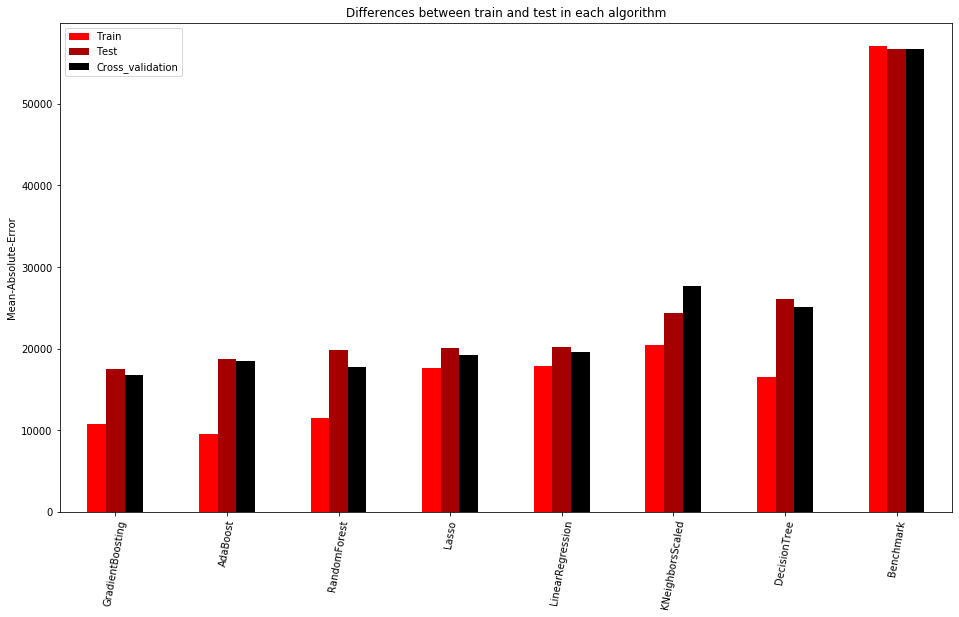

In [79]:
train = x['train'].values.tolist()
test = x['test'].values.tolist()
cv = x['cross_validation'].values.tolist()
index = ['GradientBoosting', 'AdaBoost', 'RandomForest',
         'Lasso', 'LinearRegression', 'KNeighborsScaled', 'DecisionTree','Benchmark']
df = pd.DataFrame({'Train': train,
                   'Test': test,
                  'Cross_validation' : cv}, index=index)
ax = df.plot.bar(rot=80,colormap='flag',figsize = (16,9));
plt.title('Differences between train and test in each algorithm');
plt.ylabel('Mean-Absolute-Error');

## Q8 
### Hyperparameters

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
test_mae = []
x=[]

for i in range(2,20):
    gradient = GradientBoostingRegressor(n_estimators=150)
    X = df.drop('SalePrice',axis=1)
    y = df['SalePrice']
    score = cross_validate(gradient,X=X,y=y, cv=i, scoring='neg_mean_absolute_error')
    test_mae.append(abs(score['test_score'].mean()))
    x.append(i)

Text(0.5, 0, 'CV Size')

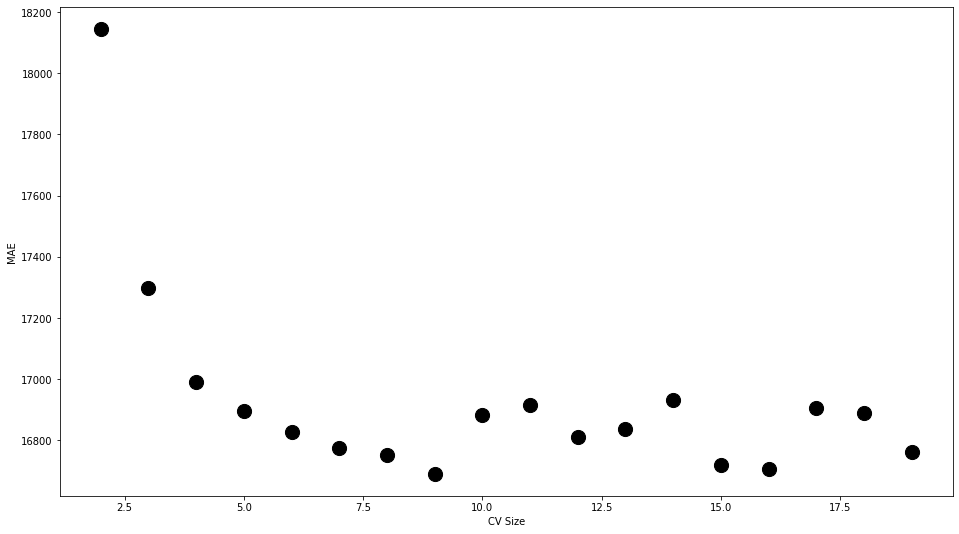

In [100]:
plt.figure(figsize=(16,9))
plt.scatter(x[:], test_mae[:], s=200,color='Black' )
plt.ylabel('MAE')
plt.xlabel('CV Size')

### 9.A

In [101]:
gradient = GradientBoostingRegressor(random_state=101)

# the list is calculated by multiple the precentage of 0.1,0.3,0.5,0.7,1 with the sum of the rows in the data. 
precentage = [0.1,0.3,0.5,0.7,1]
list = [137,413,690,965,1379]
MAE = []
for item in list:
        X_r_train, y_r_train = X_train[:item],y_train[:item]
        gradient.fit(X_r_train,y_r_train)
        pred = gradient.predict(X_test)
        MAE.append(mean_absolute_error(y_test,pred))


Text(0.5, 0, 'Train Size')

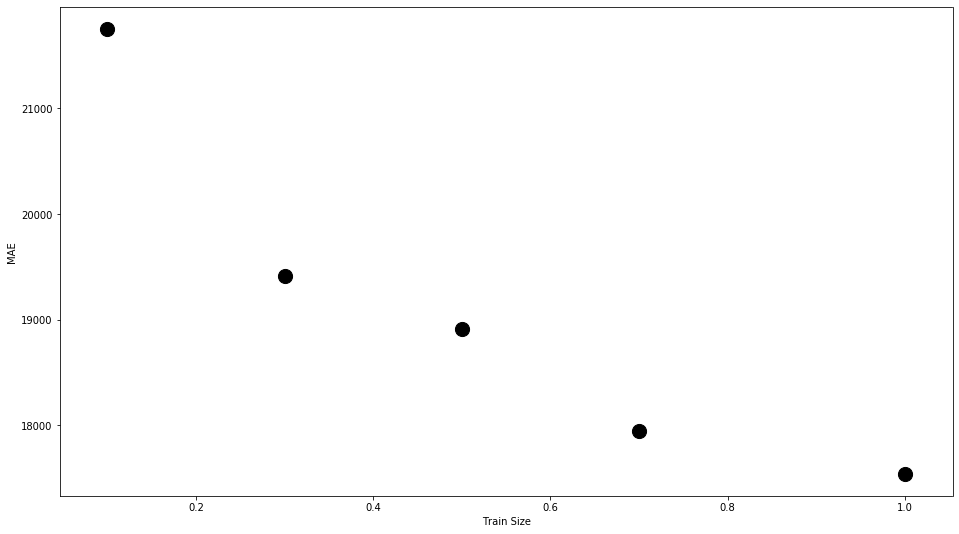

In [102]:
plt.figure(figsize=(16,9))
plt.scatter(precentage[:], MAE[:], s=200,color='Black' )
plt.ylabel('MAE')
plt.xlabel('Train Size')